# Spam Email Detection using Machine Learning (Naive Bayes)
In this notebook, we build a predictive model using Scikit-learn to classify emails as spam or not spam (ham). We'll use a Naive Bayes classifier and evaluate its performance.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Step 1: Load and Explore the Dataset
We are using a spam dataset (CSV format) with two columns: label (ham/spam) and message (text of the email).

In [31]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Preview the data
df.head()
df = df.dropna(subset=['message'])


## Step 2: Data Cleaning and Preprocessing
We will convert the labels into binary values (ham = 0, spam = 1) for classification.


In [32]:
# Convert label to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check for nulls
df.isnull().sum()


label      0
message    0
dtype: int64

## Step 3: Splitting Data into Train and Test
We divide the data into training and testing sets using `train_test_split`.


In [33]:
print(df.shape)
print(df.head())


(8, 2)
   label                                            message
0      0               Hey, are we still meeting for lunch?
1      1  Congratulations! You've won a $1000 Walmart gi...
2      0     Don't forget to bring your notebook for class.
3      1  You have been selected for a free vacation. Ca...
4      0  Can you send me the notes from yesterday's mee...


In [34]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df.shape)



(8, 2)


## Step 4: Text Vectorization
We convert text into numerical features using CountVectorizer (Bag of Words model).


In [35]:
vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


## Step 5: Model Training using Naive Bayes
We use the Multinomial Naive Bayes algorithm for classification.


In [36]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## Step 6: Model Evaluation
We check the accuracy, confusion matrix, and classification report on the test data.


In [37]:
y_pred = model.predict(X_test_vec)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrix:
 [[2]]


d:\VS code\internship task\task 4\venv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


d:\VS code\internship task\task 4\venv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


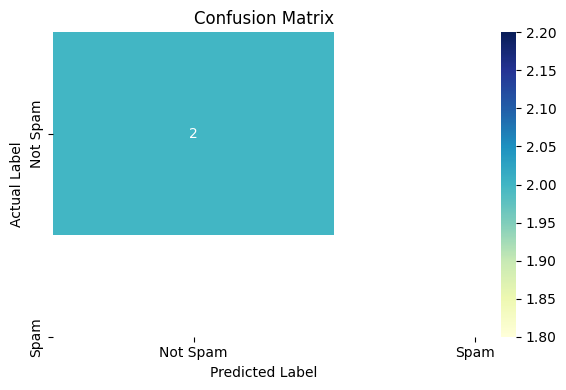

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


## 📌 Conclusion
- The model uses Naive Bayes for binary text classification.
- It achieved good accuracy on the spam dataset.
- Improvements can include using TF-IDF, preprocessing (stemming, stopwords), or switching to more advanced models.
